In [249]:

import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [250]:
#creating a dataframe
data=pd.read_csv("HousingData.csv")
data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [251]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [252]:

data.isna().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


there is presence of missing data in 5 columns

In [253]:

data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [254]:

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


Using the most frequent data to fill the missing columns as the arent many to warrant dropping the whole column

In [255]:

data_imputed.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.469705,10.768775,11.361304,0.067194,0.554695,6.284634,69.762846,3.795043,9.549407,408.237154,18.455534,356.674032,12.464229,22.532806
std,8.574515,23.025124,6.837487,0.250605,0.115878,0.702617,28.118032,2.105710,8.707259,168.537116,2.164946,91.294864,7.121443,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.068907,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,6.590000,17.025000
50%,0.224635,0.000000,9.900000,0.000000,0.538000,6.208500,79.050000,3.207450,5.000000,330.000000,19.050000,391.440000,10.925000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,94.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [256]:

data_imputed.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

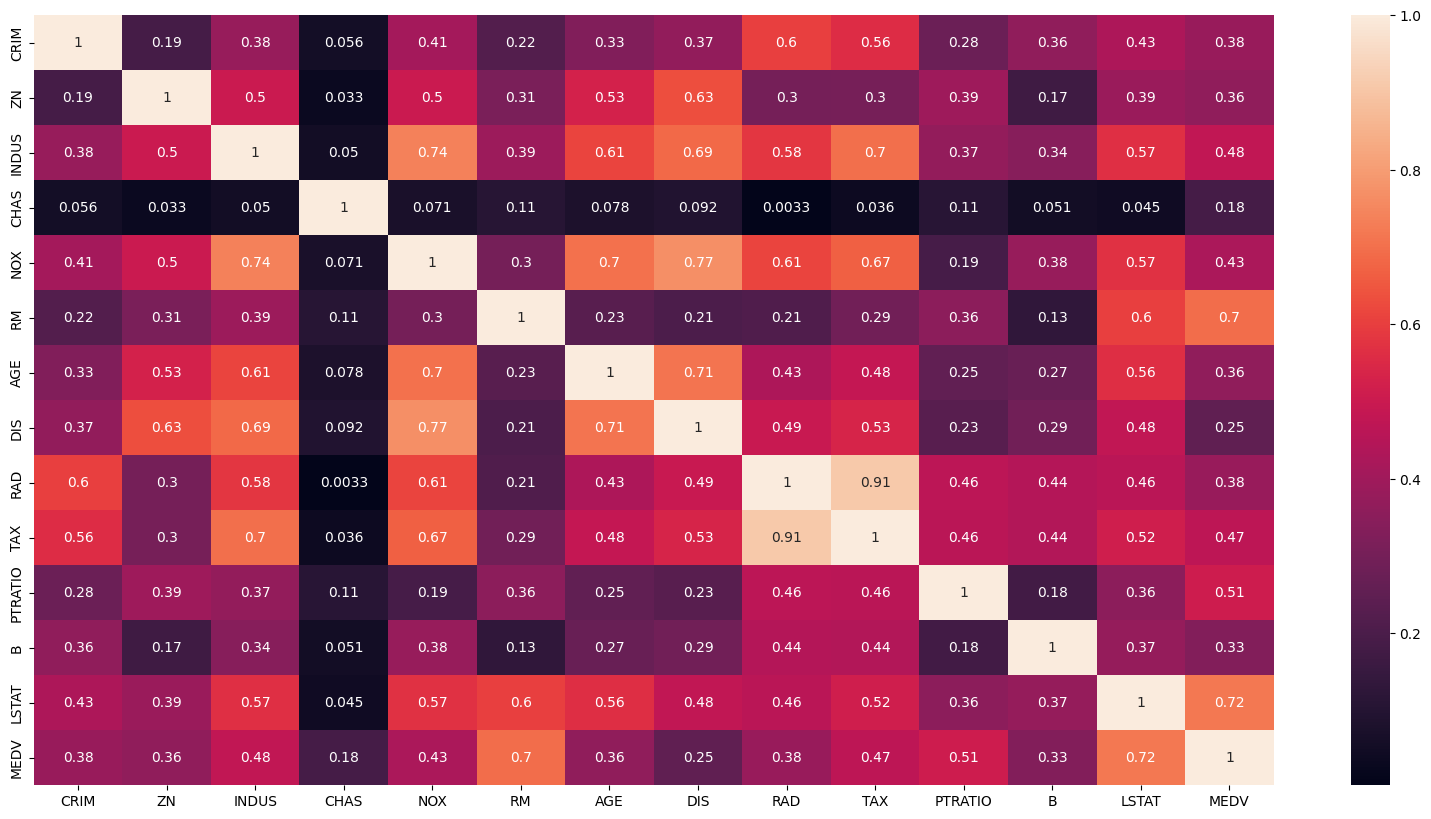

In [257]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_imputed.corr().abs(),  annot=True)

plt.show()



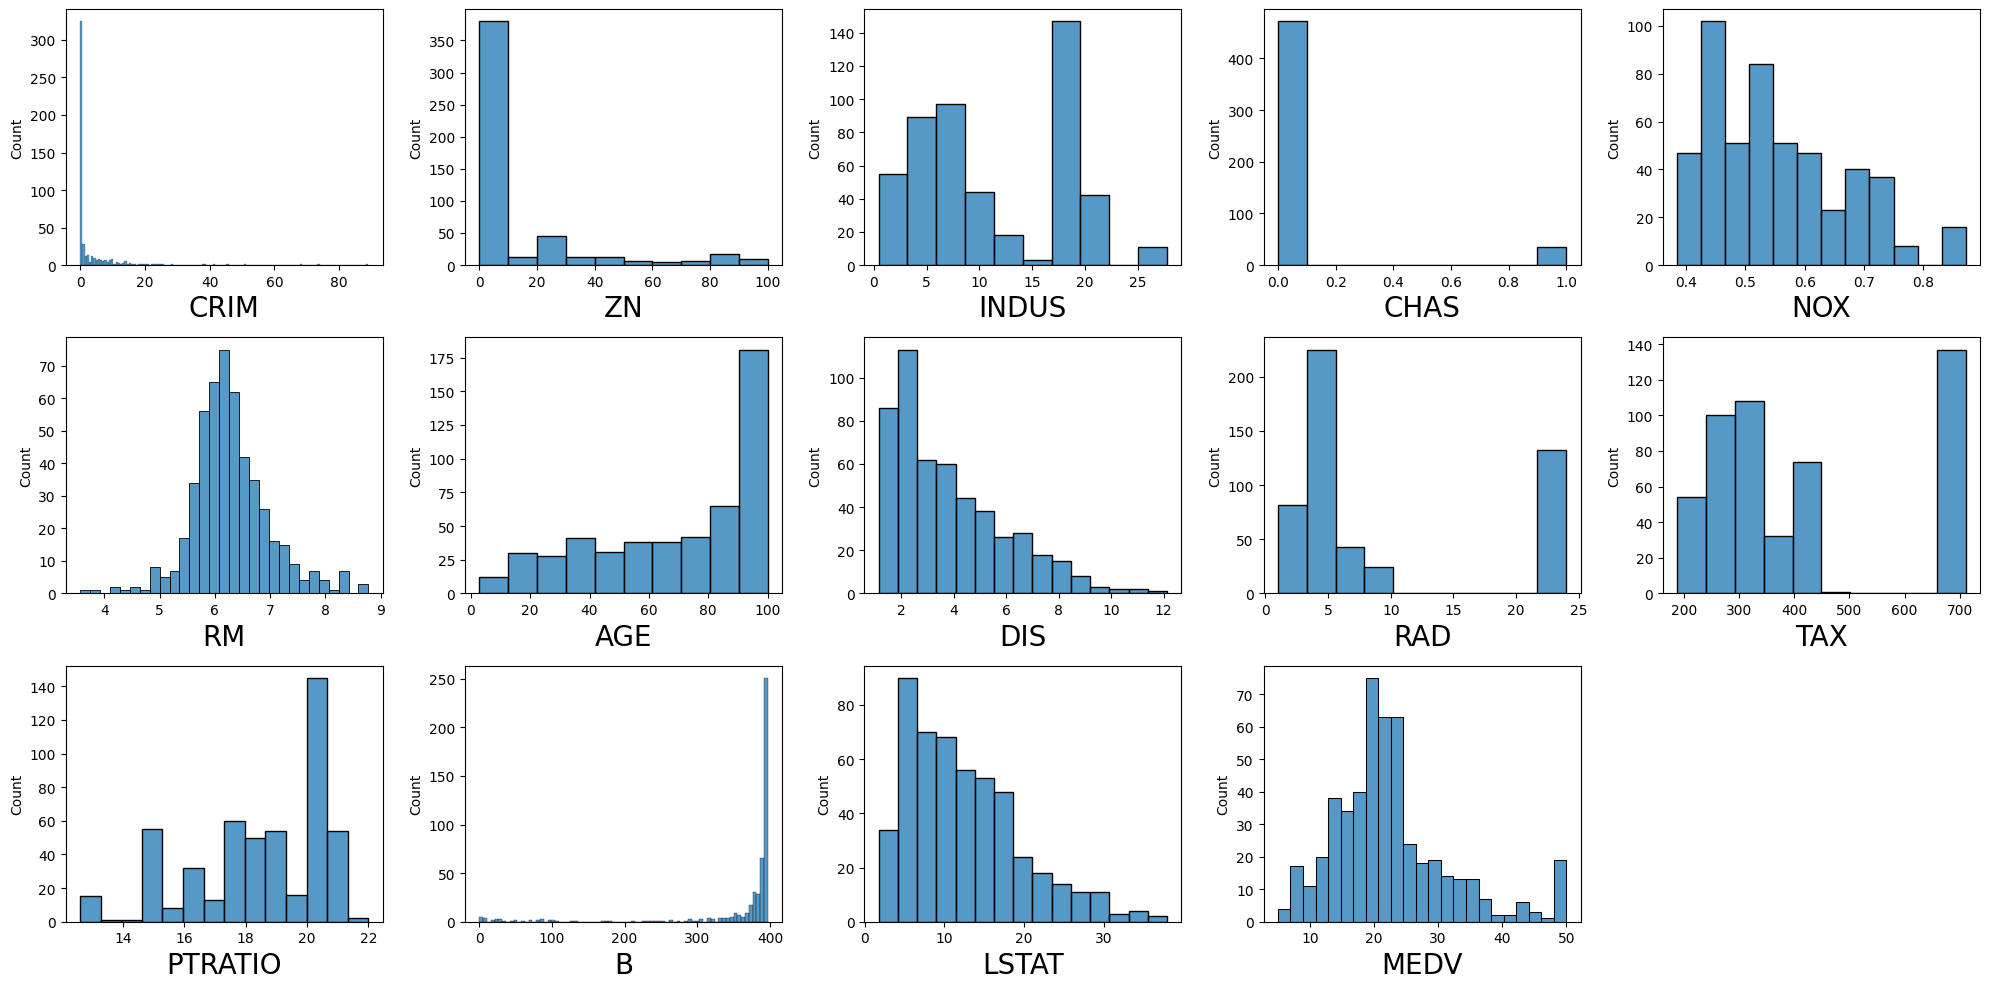

In [258]:
#distribution for every column
plt.figure(figsize=(20, 10))
plotnumber = 1
for column in data_imputed:
    if plotnumber<=14 :
        ax = plt.subplot(3,5,plotnumber)
        sns.histplot(data_imputed[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()


CRIM-peer capita crime rate by town
ZN-residential land zoned for large lots
INDUS-non retailbusiness acres per town
CHAS-property located on Charles river.
NOX -nitric oxide concentration (measure of air polllution)
RM-rooms >average number of rooms per dwelling in a given area.
AGE-houses built before 1940
Dis-represents the weighted distances to 5 Boston employment centers .provides inffo about the weighted distances from a residential area to employment centers.(they are based on acccessibility and convinience of transportation to employment centers.)
RAD-index for accessibility to radial highways.
TAx-tax rate.property tax rate for each property.
PTRATIO-pupil teacher ratio.
number of students to the number of teachers in the school disrict.
B-proportion of black residents in town.
LSTAT-lower status of the population in the neighbourhoodd considered to be of lower socio economic status.
MEDV-median value of owner occcupied homes.
Median prices of homes

In [259]:

#distribution for every column
#plt.figure(figsize=(20, 10))
#plotnumber = 1
#f#or column in data_imputed:
  #  if plotnumber<=14 :
   #     ax = plt.subplot(3,5,plotnumber)
    #    sns.displot(data_imputed[column])
     #   plt.xlabel(column,fontsize=20)
    #plotnumber+=1
#plt.tight_layout()
#plt.show()


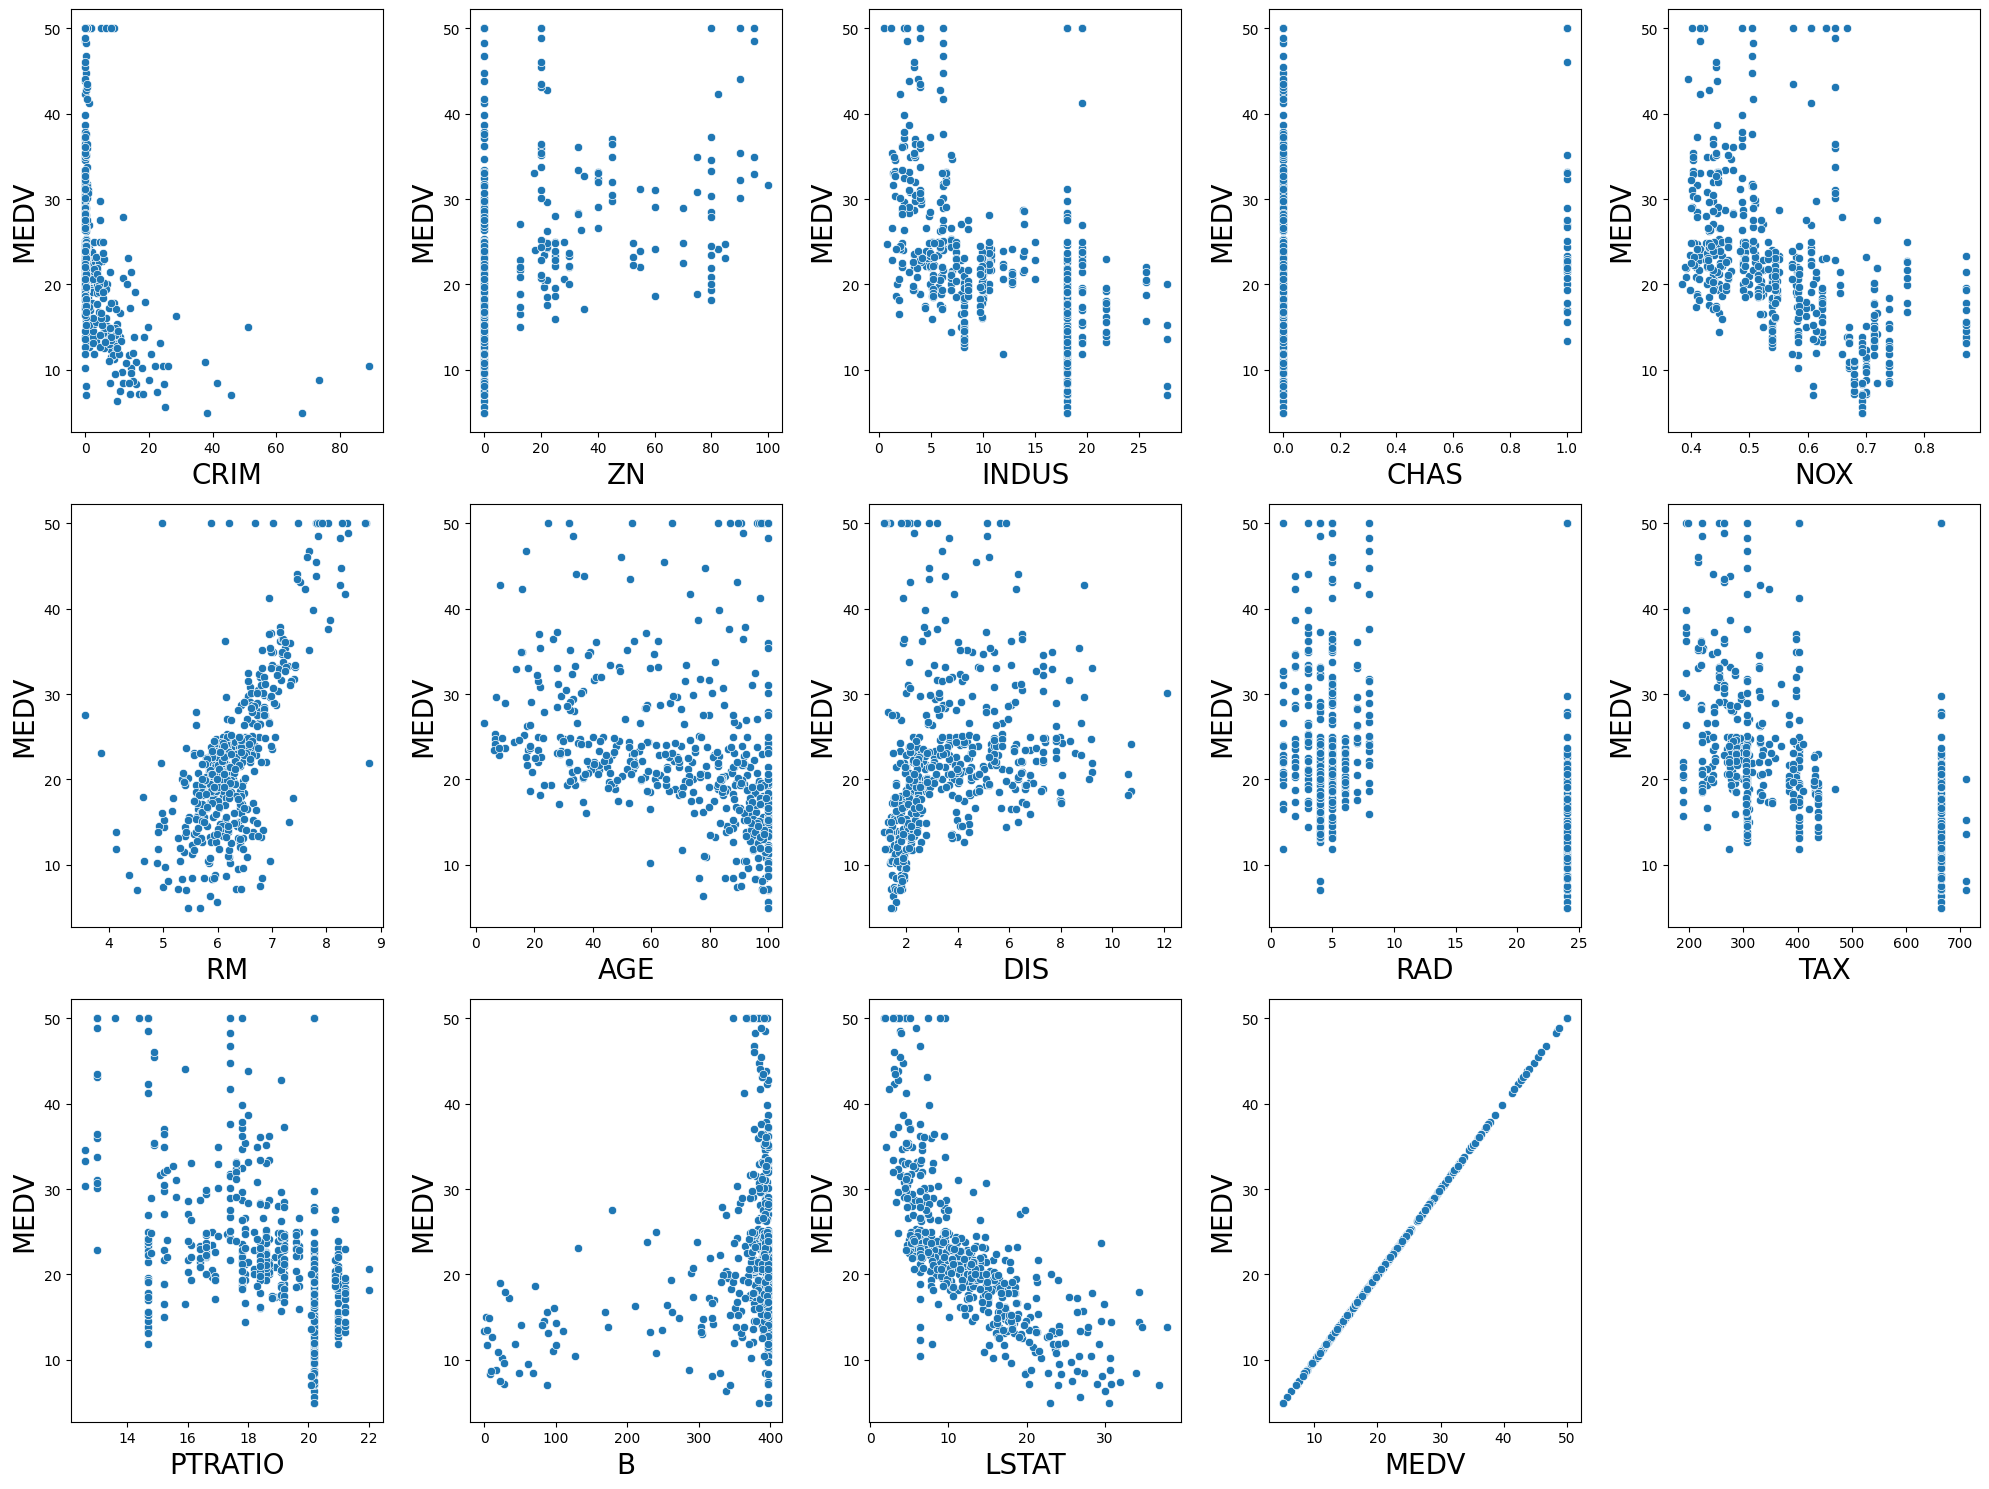

In [260]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named data_imputed
columns_to_plot = data_imputed.columns

plt.figure(figsize=(20,15))

for plotnumber, column in enumerate(columns_to_plot, 1):
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x=column, y='MEDV', data=data_imputed)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('MEDV', fontsize=20)

plt.tight_layout()
plt.show()


INSIGHTS

RM (Average Number of Rooms):
Positive correlation:Generally upward trend, indicating that houses with more rooms tend to have higher prices.

LSTAT (Percentage of Lower Status of the Population):
Negative correlation: A downward trend suggest that areas with a higher percentage of lower-status population tend to have lower housing prices.

CRIM (Per Capita Crime Rate):
Negative correlation: Higher crime rates may lead to lower housing prices.

TAX (Property Tax Rate):
Potential negative correlation: Higher tax rates could be associated with lower-priced houses.

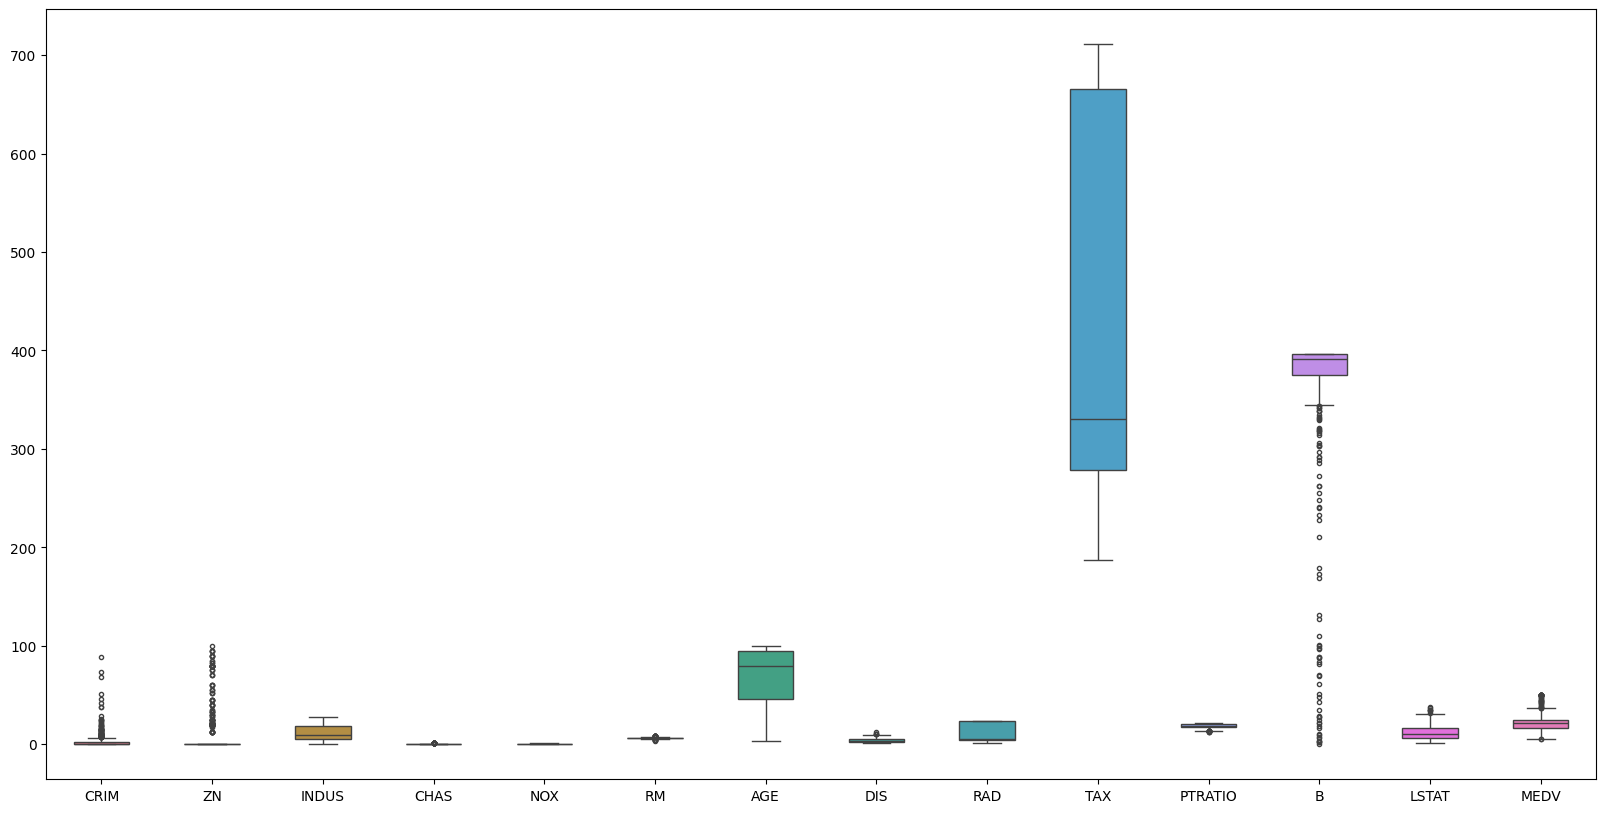

In [261]:
#looking for outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=data_imputed, width= 0.5, fliersize=3)
plt.show()



there is presence of outliers


In [262]:

from scipy import stats

# Calculate Z-scores for each column
z_scores = stats.zscore(data_imputed)

# Identify potential outliers
outliers = (z_scores > 3) | (z_scores < -3)

# Print the count of potential outliers for each column
outliers_count = pd.DataFrame(outliers, columns=data_imputed.columns).sum()
print("Count of potential outliers for each column:")
print(outliers_count)


Count of potential outliers for each column:
CRIM        8
ZN         28
INDUS       0
CHAS       34
NOX         0
RM          8
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO     0
B          25
LSTAT       6
MEDV        0
dtype: int64


In [263]:
import numpy as np
from scipy import stats

# Specify columns with potential outliers
columns_with_outliers = ['CRIM', 'ZN', 'CHAS', 'RM', 'B', 'LSTAT']

# Calculate Z-scores
z_scores = np.abs(stats.zscore(data_imputed[columns_with_outliers]))

# Set a threshold for flagging outliers
threshold = 5

# Identify and remove outliers
outliers_mask = (z_scores > threshold).any(axis=1)
data_imputed_no_outliers = data_imputed[~outliers_mask]

# Count of potential outliers after removal
outliers_count_after_removal = outliers_mask.sum()
print(f'Count of potential outliers after removal: {outliers_count_after_removal}')

# Update X and y based on the cleaned data




Count of potential outliers after removal: 4


In [264]:

# Calculate IQR for each column
Q1 = data_imputed.quantile(0.25)
Q3 = data_imputed.quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers using IQR
outliers_iqr_mask = ((data_imputed < (Q1 - 10. * IQR)) | (data_imputed > (Q3 + 10. * IQR))).any(axis=1)

# Remove outliers
data_imputed_no_outliers_iqr = data_imputed[~outliers_iqr_mask]

# Count of potential outliers after removal using IQR
outliers_count_after_removal_iqr = outliers_iqr_mask.sum()
print(f'Count of potential outliers after removal using IQR: {outliers_count_after_removal_iqr}')


Count of potential outliers after removal using IQR: 192


In [265]:

#removing outliers
#q = data_imputed['CRIM'].quantile(0.98)
# we are removing the top 2% data from the CRIM column
#data_cleaned = data_imputed[data_imputed['CRIM']<q]


In [266]:

X = data_imputed_no_outliers.drop(columns=['MEDV'])
y = data_imputed_no_outliers['MEDV']

In [267]:
#lets use stardardscaler to remove the outliers from the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_imputed_no_outliers)



In [268]:
X_scaled

array([[-0.48478045,  0.30967875, -1.31712588, ...,  0.4386117 ,
        -1.04615909,  0.14929197],
       [-0.48130774, -0.47043199, -0.62032757, ...,  0.4386117 ,
        -0.46138841, -0.11305775],
       [-0.48131105, -0.47043199, -0.62032757, ...,  0.39281445,
        -1.17970047,  1.31893447],
       ...,
       [-0.47577357, -0.47043199,  0.09110937, ...,  0.4386117 ,
        -0.95338298,  0.13836073],
       [-0.46769484, -0.47043199,  0.09110937, ...,  0.39979093,
        -0.83530428, -0.06933279],
       [-0.47798227, -0.47043199,  0.09110937, ...,  0.4386117 ,
        -0.63850646, -1.17338787]])

In [269]:
#%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [270]:
import statsmodels.api as sm
#lets check for multicollinearity using VIF(Variance Inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = data_imputed_no_outliers.columns
#lets check the values
vif



,VIF,Features
0,2.443076,CRIM
1,2.159275,ZN
2,3.318948,INDUS
3,1.090889,CHAS
4,4.376022,NOX
5,2.277337,RM
6,2.614357,AGE
7,4.057619,DIS
8,7.814145,RAD
9,8.436746,TAX


RAD and TAX have high VIF values hence high multicollinearity.i will remove RAD (feature with high VIF)

In [271]:

#dropping the columns with high VIF
X.drop(columns = ['RAD'],axis=1,inplace=True)

In [272]:

print(X.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


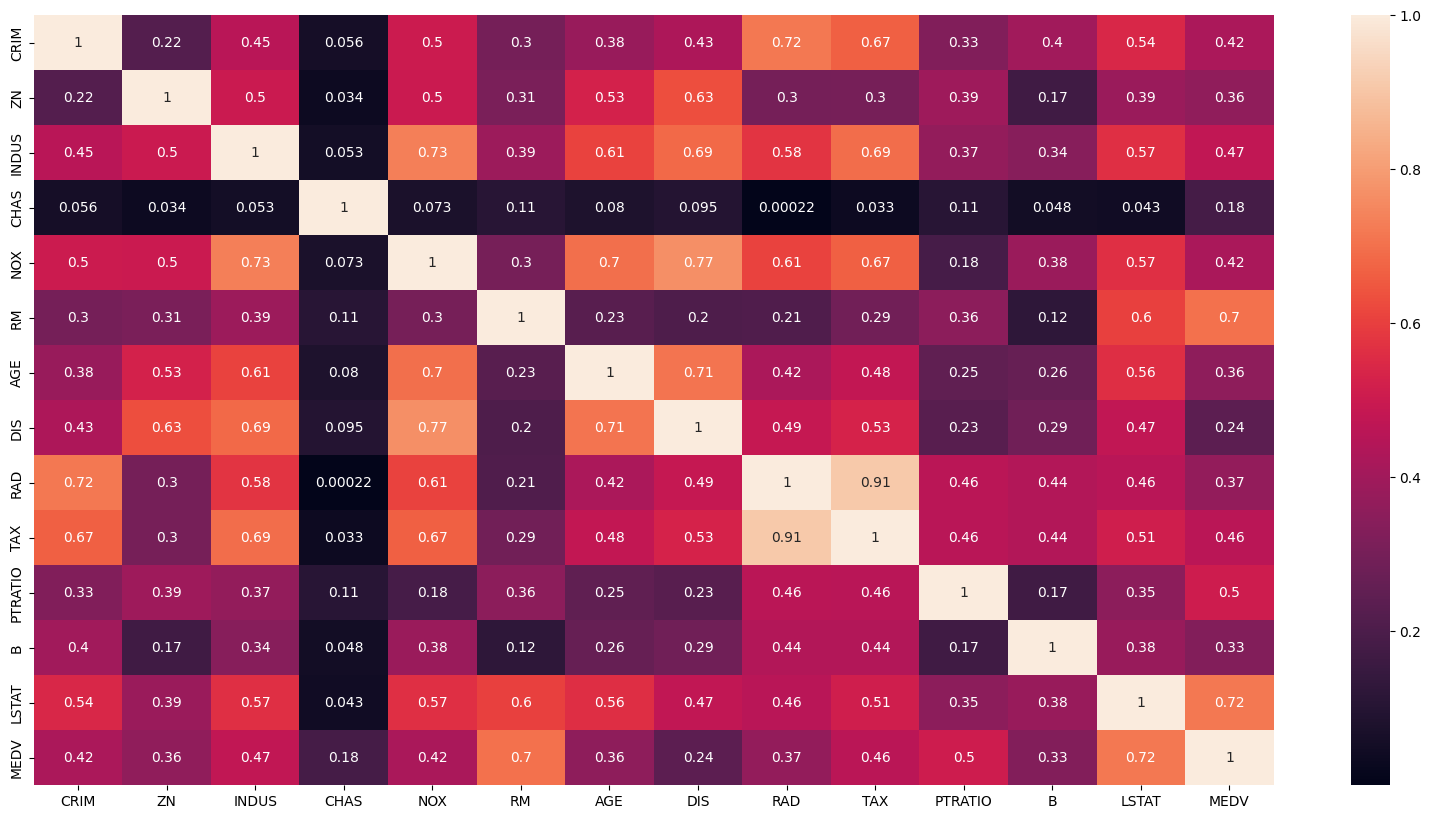

In [273]:

#heatmap for correlation
plt.figure(figsize=(20, 10))
sns.heatmap(data_imputed_no_outliers.corr().abs(),  annot=True)
plt.show()

In [274]:

import statsmodels.formula.api as smf
lm=smf.ols(formula='MEDV~TAX',data=data_imputed_no_outliers).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     134.0
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           1.29e-27
Time:                        23:11:49   Log-Likelihood:                -1763.9
No. Observations:                 502   AIC:                             3532.
Df Residuals:                     500   BIC:                             3540.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.8354      0.953     34.446      0.000      30.963      34.708
TAX           -0.0251      0.002    -11.575      0.000      -0.029      -0.021
==============================================================================
Omnibus:                      170.517   Durbin-Watson:                   0.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              483.561
Skew:                           1.659   Prob(JB):                    9.91e-106
Kurtosis:                       6.481   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [275]:
lm=smf.ols(formula='MEDV~RAD',data=data_imputed_no_outliers).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     79.51
Date:                Sat, 27 Jan 2024   Prob (F-statistic):           9.02e-18
Time:                        23:11:49   Log-Likelihood:                -1786.5
No. Observations:                 502   AIC:                             3577.
Df Residuals:                     500   BIC:                             3585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.3358      0.563     46.796      0.000      25.230      27.441
RAD           -0.3923      0.044     -8.917      0.000      -0.479      -0.306
==============================================================================
Omnibus:                      147.757   Durbin-Watson:                   0.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.357
Skew:                           1.512   Prob(JB):                     5.06e-77
Kurtosis:                       5.767   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


INSIGHTS
we shall drop TAX as their is strong multicollinearity

In [276]:
data.drop(columns = ['TAX'],axis=1,inplace=True)

In [277]:

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,18.7,396.90,NaN,36.2


In [278]:

data.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,22.000000,396.900000,37.970000,50.000000


In [279]:

#spllitng the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=42)

In [280]:

#lets check the shape of the train and test data
print(X_train.shape)
print(X_test.shape)

(351, 14)
(151, 14)


In [281]:

#fittng the model
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)


LinearRegression()

In [282]:

#predicting the values
y_pred=regression.predict(X_test)


In [283]:

#training accuracy of the model
regression.score(X_train,y_train)


1.0

In [284]:
#testing accuracy of the model
regression.score(X_test,y_test)

1.0

In [285]:
#r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)



1.0

In [286]:
#adjuated r2 score
def adj_r2(x,y):
    r2 = regression.score(X_train,y_train)
    n = X_train.shape[0]
    p = X_train.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2


In [287]:

print(adj_r2(X_train,y_train,))

1.0


In [288]:

print(adj_r2(X_test,y_test))

1.0


In [289]:

#lets check the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)


3.0951819616673296e-27

In [290]:

#lets check the root mean squared error
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))


5.563435954216899e-14

In [291]:

from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [296]:

from sklearn.decomposition import PCA

# Specify the number of components you want to retain
n_components = 12  # Adjust this based on your requirements
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)


In [293]:

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.45812331 0.11411966 0.09230847 0.07185671 0.06620895 0.05423687
 0.03942636 0.03480247 0.02005901 0.01803604]


In [298]:

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
# Find the number of components that explain 95% of the variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
print("Number of components to explain 95% variance:", n_components_95)



Number of components to explain 95% variance: 9


In [299]:

# Specify the number of components you want to retain
from sklearn.decomposition import PCA

# Assuming X is your feature matrix
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X)

# X_pca now contains the reduced feature set with 9 principal components


In [300]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)



In [301]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [302]:

from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 25.718643929269376


In [303]:
#r2 score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)



0.6667438381924803

In [304]:

#adjuated r2 score
def adj_r2(x,y):
    r2 = model.score(X_train,y_train)
    n = X_train.shape[0]
    p = X_train.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2


In [305]:

print(adj_r2(X_train,y_train,))

0.6244954545590322


In [308]:

print(adj_r2(X_test,y_test))

0.6244954545590322
